In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("players_performace.csv")

In [3]:
# 2. Display information
print("First 10 Rows")
print(df.head(10))

print("\nLast 5 Rows")
print(df.tail())

print("\nDataset Shape:", df.shape)
print("\nColumn Names:", df.columns)

print("\nData Types")
print(df.dtypes)

First 10 Rows
            Player  Matches  innings_bat  Runs  Balls_played  Outs      SR  \
0        RA Jadeja      366          169  2692          2187   108  123.09   
1       KA Pollard      275          168  3437          2447   129  140.46   
2         R Ashwin      275           81   714           622    53  114.79   
3        RG Sharma      269          237  6213          4890   219  127.06   
4         SK Raina      269          200  5536          4177   168  132.54   
5         DJ Bravo      268          110  1560          1247    69  125.10   
6        PP Chawla      260           80   609           565    53  107.79   
7          V Kohli      255          229  7273          5739   205  126.73   
8        SP Narine      253           92  1046           692    71  151.16   
9  Harbhajan Singh      248           88   833           636    56  130.97   

     Avg  Centuries  Fifties  Fours  Sixes  innings_bowl  Wickets_taken  \
0  24.93          0        2    193     99          

In [4]:
# 3. Missing values and duplicates
print("\nMissing Values")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


Missing Values
Player              0
Matches             0
innings_bat         0
Runs                0
Balls_played        0
Outs                0
SR                  0
Avg                 0
Centuries           0
Fifties             0
Fours               0
Sixes               0
innings_bowl        0
Wickets_taken       0
Total_balls         0
Total_runs_given    0
Economy             0
Bowling_avg         0
Bowling_SR          0
dtype: int64

Duplicate Rows: 0


In [5]:
# 4. NumPy operations
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\nTotal Numeric Columns:", len(numeric_cols))



Total Numeric Columns: 18


In [6]:
# Manual statistics using NumPy (example: Runs column)
if 'Runs' in df.columns:
    runs_array = df['Runs'].dropna().values
    print("\nNumPy Statistics for Runs")
    print("Mean:", np.mean(runs_array))
    print("Median:", np.median(runs_array))
    print("Std Dev:", np.std(runs_array))


NumPy Statistics for Runs
Mean: 479.4442700156986
Median: 76.0
Std Dev: 1014.0624125587627


In [7]:
# 1. Handle missing values (fill numeric with 0)
df[numeric_cols] = df[numeric_cols].fillna(0)


In [8]:
# 2. Remove duplicates
df = df.drop_duplicates()


In [9]:
# 3. Convert columns if necessary
# Example conversions (only if present)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [10]:
# 4. Create new calculated columns using NumPy

# Batting Strike Rate = (Runs / Balls) * 100
if 'Runs' in df.columns and 'Balls' in df.columns:
    df['Calculated_SR'] = np.where(df['Balls'] > 0,
                                   (df['Runs'] / df['Balls']) * 100,
                                   0)

In [11]:
# Batting Average = Runs / Dismissals
if 'Runs' in df.columns and 'Out' in df.columns:
    df['Calculated_Avg'] = np.where(df['Out'] > 0,
                                    df['Runs'] / df['Out'],
                                    df['Runs'])


In [12]:
# Bowling Economy = Runs Conceded / Overs
if 'Runs Conceded' in df.columns and 'Overs' in df.columns:
    df['Calculated_Economy'] = np.where(df['Overs'] > 0,
                                        df['Runs Conceded'] / df['Overs'],
                                        0)


In [13]:
# Top 10 by Runs
if 'Runs' in df.columns:
    top_runs = df.sort_values(by='Runs', ascending=False).head(10)
    print("\nTop 10 Players by Runs")
    print(top_runs)


Top 10 Players by Runs
            Player  Matches  innings_bat  Runs  Balls_played  Outs      SR  \
7          V Kohli      255          229  7273          5739   205  126.73   
13        S Dhawan      222          216  6617          5358   189  123.50   
29       DA Warner      177          176  6399          4719   156  135.60   
3        RG Sharma      269          237  6213          4890   219  127.06   
4         SK Raina      269          200  5536          4177   168  132.54   
31  AB de Villiers      170          170  5181          3487   125  148.58   
16        MS Dhoni      217          217  5082          3865   146  131.49   
28        CH Gayle      179          141  4997          3516   128  142.12   
20      RV Uthappa      197          197  4954          3927   184  126.15   
15      KD Karthik      220          220  4517          3492   180  129.35   

      Avg  Centuries  Fifties  Fours  Sixes  innings_bowl  Wickets_taken  \
7   35.48          7       51    646    2

In [14]:
# Top 10 by Batting Average
if 'Calculated_Avg' in df.columns:
    top_avg = df.sort_values(by='Calculated_Avg', ascending=False).head(10)
    print("\nTop 10 Players by Batting Average")
    print(top_avg)


In [15]:
# Top 10 by Strike Rate
if 'Calculated_SR' in df.columns:
    top_sr = df.sort_values(by='Calculated_SR', ascending=False).head(10)
    print("\nTop 10 Players by Strike Rate")
    print(top_sr)

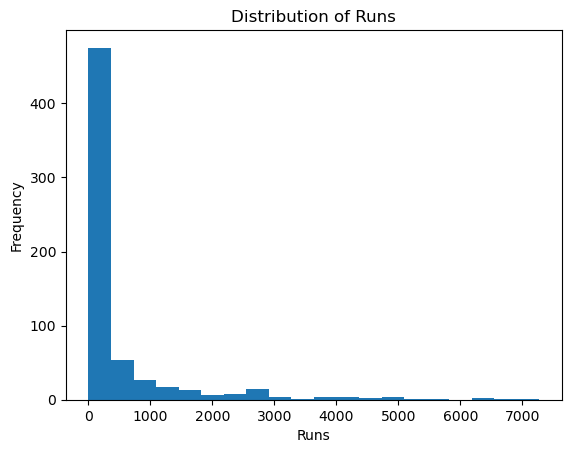

In [16]:
# Histogram of Runs
if 'Runs' in df.columns:
    plt.figure()
    plt.hist(df['Runs'], bins=20)
    plt.title("Distribution of Runs")
    plt.xlabel("Runs")
    plt.ylabel("Frequency")
    plt.show()

In [17]:
# Runs vs Strike Rate
if 'Runs' in df.columns and 'Calculated_SR' in df.columns:
    plt.figure()
    plt.scatter(df['Runs'], df['Calculated_SR'])
    plt.xlabel("Runs")
    plt.ylabel("Strike Rate")
    plt.title("Runs vs Strike Rate")
    plt.show()

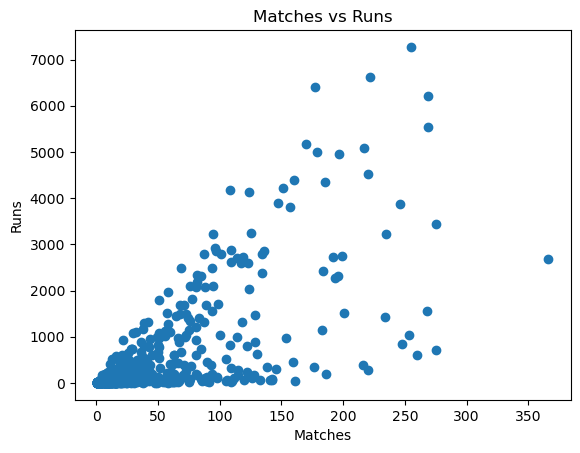

In [18]:
# Matches vs Runs
if 'Matches' in df.columns and 'Runs' in df.columns:
    plt.figure()
    plt.scatter(df['Matches'], df['Runs'])
    plt.xlabel("Matches")
    plt.ylabel("Runs")
    plt.title("Matches vs Runs")
    plt.show()

In [19]:
# NumPy statistics
if 'Runs' in df.columns:
    print("\nMean Runs:", np.mean(df['Runs']))

if 'Calculated_SR' in df.columns:
    print("Median Strike Rate:", np.median(df['Calculated_SR']))

if 'Calculated_Avg' in df.columns:
    print("Std Dev of Batting Average:", np.std(df['Calculated_Avg']))



Mean Runs: 479.4442700156986


In [20]:
# Part 4: Bowling Analysis
# ==========================================

if 'Wickets' in df.columns:

    # Top 10 by wickets
    top_wickets = df.sort_values(by='Wickets', ascending=False).head(10)
    print("\nTop 10 Bowlers by Wickets")
    print(top_wickets)

    # Top economy
    if 'Calculated_Economy' in df.columns:
        top_economy = df.sort_values(by='Calculated_Economy').head(10)
        print("\nTop 10 Bowlers by Economy")
        print(top_economy)

    # Histogram
    plt.figure()
    plt.hist(df['Wickets'], bins=20)
    plt.title("Wickets Distribution")
    plt.xlabel("Wickets")
    plt.ylabel("Frequency")
    plt.show()

    # Economy vs Wickets
    if 'Calculated_Economy' in df.columns:
        plt.figure()
        plt.scatter(df['Wickets'], df['Calculated_Economy'])
        plt.xlabel("Wickets")
        plt.ylabel("Economy")
        plt.title("Economy vs Wickets")
        plt.show()

    # NumPy stats
    print("\nAverage Wickets:", np.mean(df['Wickets']))

    if 'Calculated_Economy' in df.columns:
        print("Best Economy:", np.min(df['Calculated_Economy']))
        corr = np.corrcoef(df['Wickets'], df['Calculated_Economy'])
        print("Correlation (Wickets vs Economy):")
        print(corr)

In [21]:
if 'Team' in df.columns:

    # Total runs per team
    if 'Runs' in df.columns:
        team_runs = df.groupby('Team')['Runs'].sum()
        print("\nTotal Runs per Team")
        print(team_runs)

        plt.figure()
        team_runs.plot(kind='bar')
        plt.title("Team vs Total Runs")
        plt.ylabel("Runs")
        plt.show()

    # Average batting average per team
    if 'Calculated_Avg' in df.columns:
        team_avg = df.groupby('Team')['Calculated_Avg'].mean()
        print("\nAverage Batting Average per Team")
        print(team_avg)

    # Total wickets per team
    if 'Wickets' in df.columns:
        team_wickets = df.groupby('Team')['Wickets'].sum()
        print("\nTotal Wickets per Team")
        print(team_wickets)

        plt.figure()
        team_wickets.plot(kind='bar')
        plt.title("Team vs Total Wickets")
        plt.ylabel("Wickets")
        plt.show()



In [22]:
# Most consistent batsman (low std of runs)
if 'Player' in df.columns and 'Runs' in df.columns:
    consistency = df.groupby('Player')['Runs'].std().sort_values()
    print("\nMost Consistent Batsmen")
    print(consistency.head(10))


Most Consistent Batsmen
Player
A Ashish Reddy   NaN
A Badoni         NaN
A Chandila       NaN
A Chopra         NaN
A Choudhary      NaN
A Dananjaya      NaN
A Flintoff       NaN
A Kumble         NaN
A Manohar        NaN
A Mishra         NaN
Name: Runs, dtype: float64


In [23]:
# Most impactful bowler
if 'Wickets' in df.columns and 'Calculated_Economy' in df.columns:
    df['Impact_Score'] = df['Wickets'] / (df['Calculated_Economy'] + 1)
    impactful = df.sort_values(by='Impact_Score', ascending=False).head(10)
    print("\nMost Impactful Bowlers")
    print(impactful[['Player', 'Wickets', 'Calculated_Economy', 'Impact_Score']])

In [24]:
# Box plot for batting averages
if 'Calculated_Avg' in df.columns:
    plt.figure()
    plt.boxplot(df['Calculated_Avg'])
    plt.title("Batting Average Box Plot")
    plt.show()


In [25]:
# Pie chart for Role
if 'Role' in df.columns:
    role_counts = df['Role'].value_counts()
    plt.figure()
    plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%')
    plt.title("Player Role Distribution")
    plt.show()


In [26]:
# Correlation matrix using NumPy
numeric_data = df.select_dtypes(include=[np.number])
corr_matrix = np.corrcoef(numeric_data.T)

In [27]:
print("\nCorrelation Matrix (NumPy)")
print(corr_matrix)



Correlation Matrix (NumPy)
[[ 1.00000000e+00  8.40638569e-01  7.00774638e-01  7.03149473e-01
   7.79831043e-01  2.50740011e-01  3.21193415e-01  3.46606572e-01
   5.80672820e-01  6.60291575e-01  6.92145799e-01  7.49973051e-01
   6.71976709e-01  7.00464803e-01  6.97217637e-01  9.26821749e-02
   1.02772300e-01  1.43722605e-01]
 [ 8.40638569e-01  1.00000000e+00  9.56222147e-01  9.58246661e-01
   9.88148849e-01  3.37189871e-01  4.99907975e-01  5.29249726e-01
   8.57411841e-01  9.28548372e-01  9.01272539e-01  2.72207294e-01
   1.85927471e-01  2.10453141e-01  2.06191618e-01 -7.29107816e-02
  -5.78882769e-02 -4.61793220e-02]
 [ 7.00774638e-01  9.56222147e-01  1.00000000e+00  9.96762357e-01
   9.73517942e-01  3.20600859e-01  5.37893512e-01  6.61108466e-01
   9.59353437e-01  9.85044069e-01  9.36038613e-01  7.71823861e-02
   7.70464579e-04  1.89629483e-02  1.63624368e-02 -9.99712674e-02
  -9.37398430e-02 -9.18153789e-02]
 [ 7.03149473e-01  9.58246661e-01  9.96762357e-01  1.00000000e+00
   9.7644

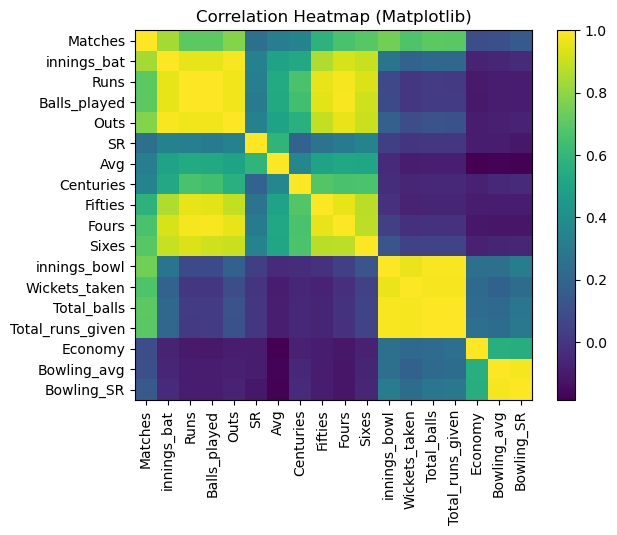

In [28]:
# Heat-style visualization using Matplotlib
plt.figure()
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.title("Correlation Heatmap (Matplotlib)")
plt.xticks(range(len(numeric_data.columns)), numeric_data.columns, rotation=90)
plt.yticks(range(len(numeric_data.columns)), numeric_data.columns)
plt.show()